# Detection of Parkinson's disease using gait

---
Include libraries

In [23]:
from scipy import stats
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from scipy.stats import spearmanr
from sklearn.model_selection import GridSearchCV, KFold, LeaveOneOut
from sklearn import metrics
from sklearn.metrics import make_scorer


from scipy import ndimage
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
import numpy as np
import os
from IPython.display import display, Image
from evalModel import predict_on_image


---
Load data and define parameters


In [3]:
SIGNAL=2 # 0:accX, 1:accY, 2:accZ, 3:GyrX, 4:GyrY, 5:GyrZ
PATH_HC="C:/Users/elmon/Desktop/work/Gait Analysis/GaitCNN/data/HCyoung_raw/"
PATH_PD="C:/Users/elmon/Desktop/work/Gait Analysis/GaitCNN/data/PD_raw/"

SIZE_FRAME=10.0
TIME_SHIFT=2.0
FS=100.0
NFFT=256 # 256ms
NOVERLAP=250 # 250ms
# image size=129*125
SIZE_IMAGE=[310,445]
PIXEL_DEPTH=255



---
Compute the Time-frequency representation (Short time Fourier transform)

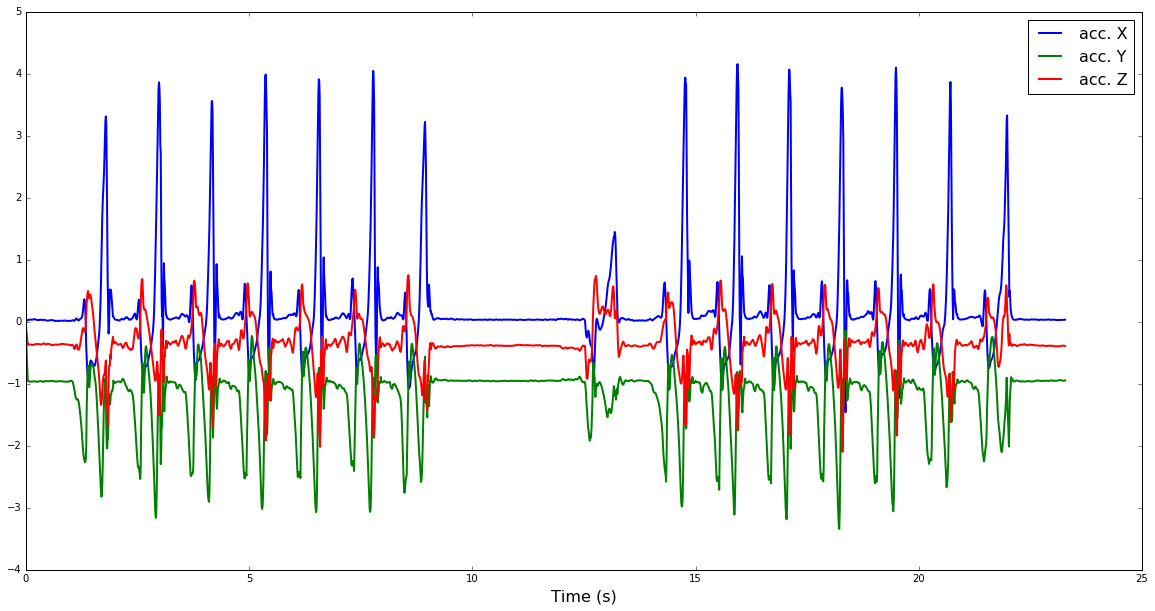

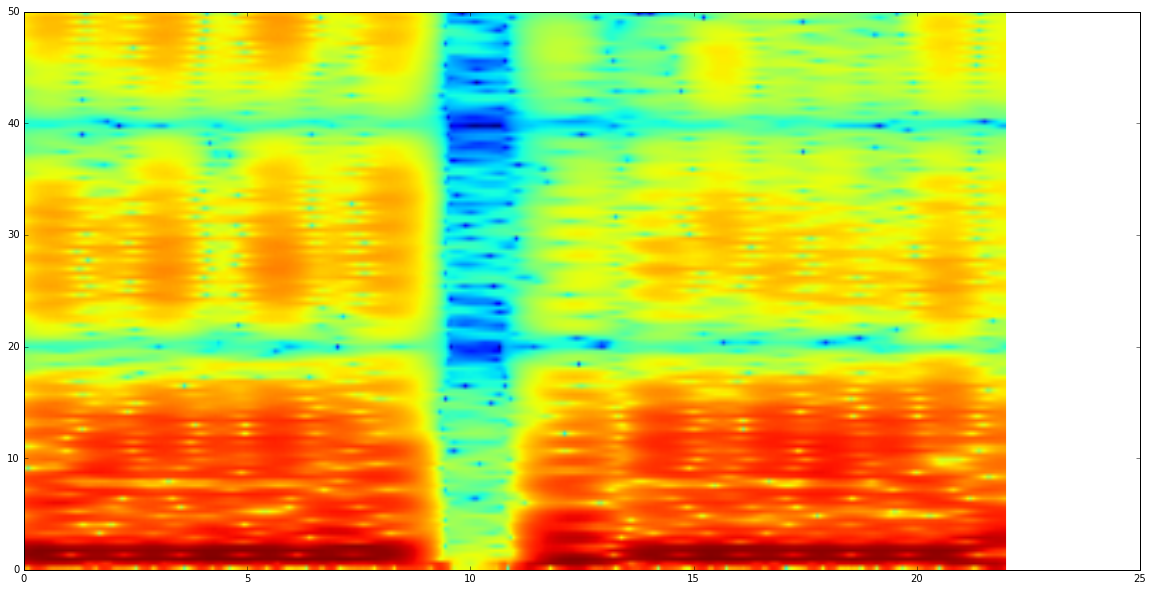

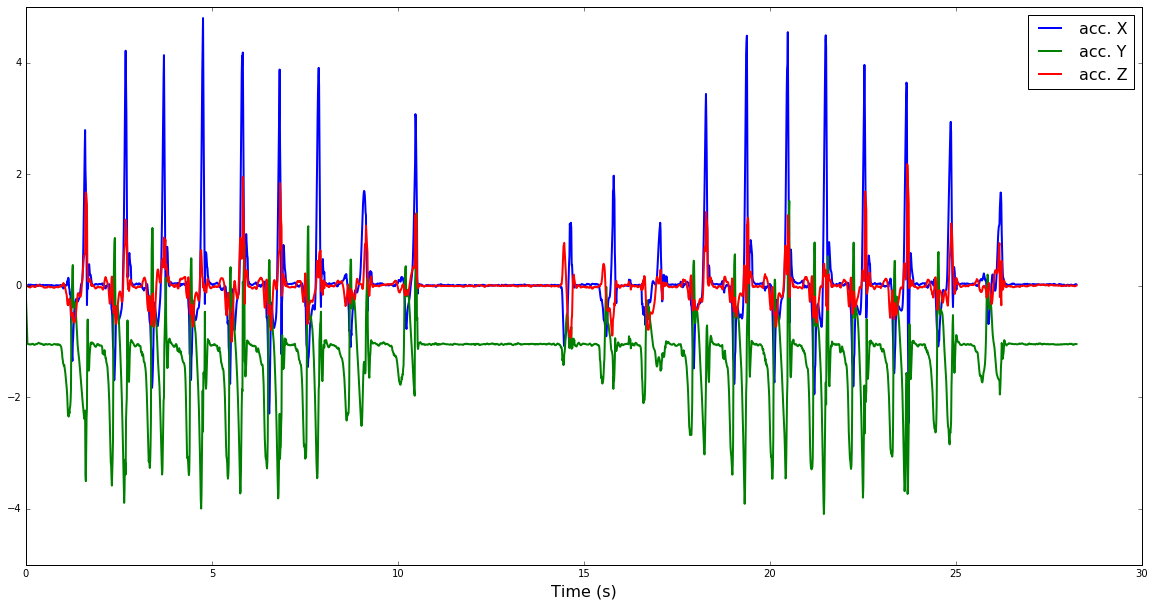

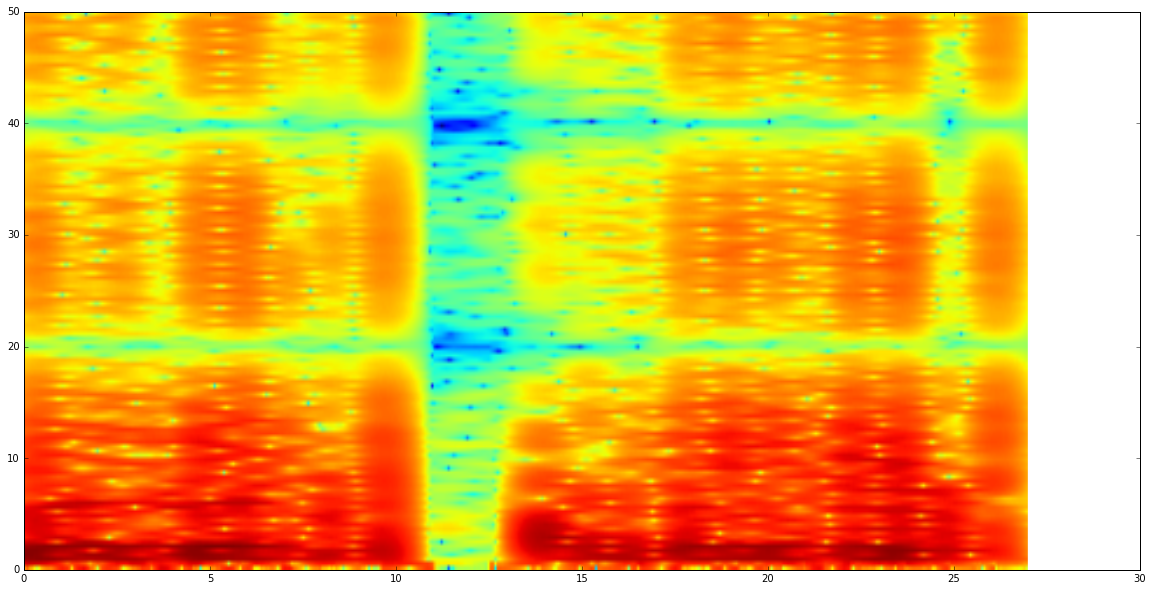

In [4]:
hf=os.listdir(PATH_HC)
hf.sort()

datafull=np.loadtxt(PATH_HC+hf[1])
dataframe=datafull[:,SIGNAL]

plt.figure(1,figsize=(20,10))
t=np.arange(0,float(len(dataframe))/FS, 1./FS)
plt.plot(t, datafull[:,0], linewidth=2, label='acc. X')
plt.plot(t, datafull[:,1], linewidth=2, label='acc. Y')
plt.plot(t, datafull[:,2], linewidth=2, label='acc. Z')
plt.xlabel('Time (s)', fontsize=16)
plt.legend(fontsize=16)
plt.show()

plt.figure(2,figsize=(20,10))

plt.specgram(dataframe, NFFT=NFFT, Fs=FS, window=mlab.window_hanning, noverlap=NOVERLAP, detrend=mlab.detrend_mean)
#plt.imshow(spec, aspect='equal')
#print(spec.shape)
plt.show()



hf2=os.listdir(PATH_PD)
hf2.sort()

datafull=np.loadtxt(PATH_PD+hf2[5])
dataframe=datafull[:,SIGNAL]

plt.figure(1,figsize=(20,10))
t=np.arange(0,float(len(dataframe))/FS, 1./FS)
plt.plot(t, datafull[:,0], linewidth=2, label='acc. X')
plt.plot(t, datafull[:,1], linewidth=2, label='acc. Y')
plt.plot(t, datafull[:,2], linewidth=2, label='acc. Z')
plt.xlabel('Time (s)', fontsize=16)
plt.legend(fontsize=16)
plt.show()

plt.figure(2,figsize=(20,10))

plt.specgram(dataframe, NFFT=NFFT, Fs=FS, window=mlab.window_hanning, noverlap=NOVERLAP, detrend=mlab.detrend_mean)
#plt.imshow(spec, aspect='equal')
#print(spec.shape)
plt.show()



## Retrain Inception Network 

### ACC=92.6%

[0.17354822158813477, 0.8264517784118652]


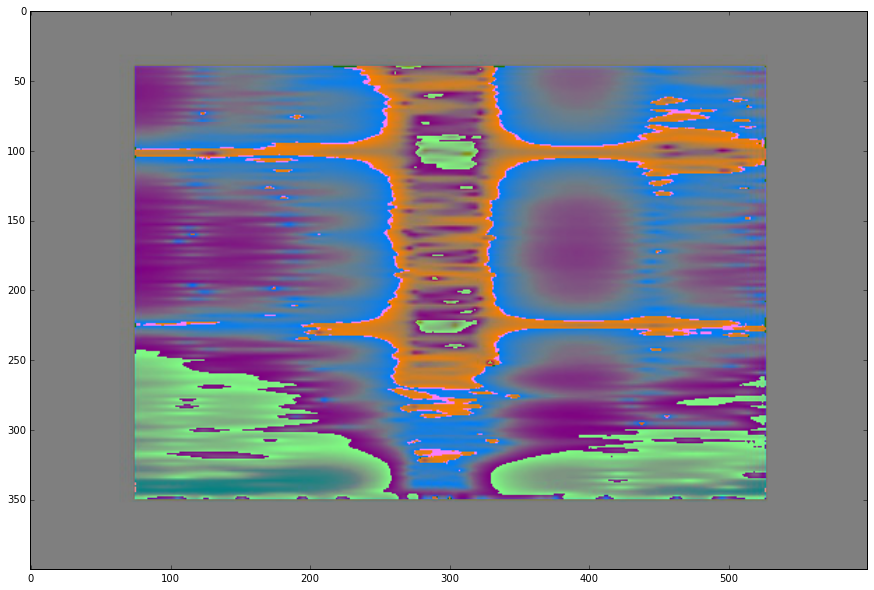

1
drawing is detected as healthy
[0.7609137892723083, 0.23908624053001404]


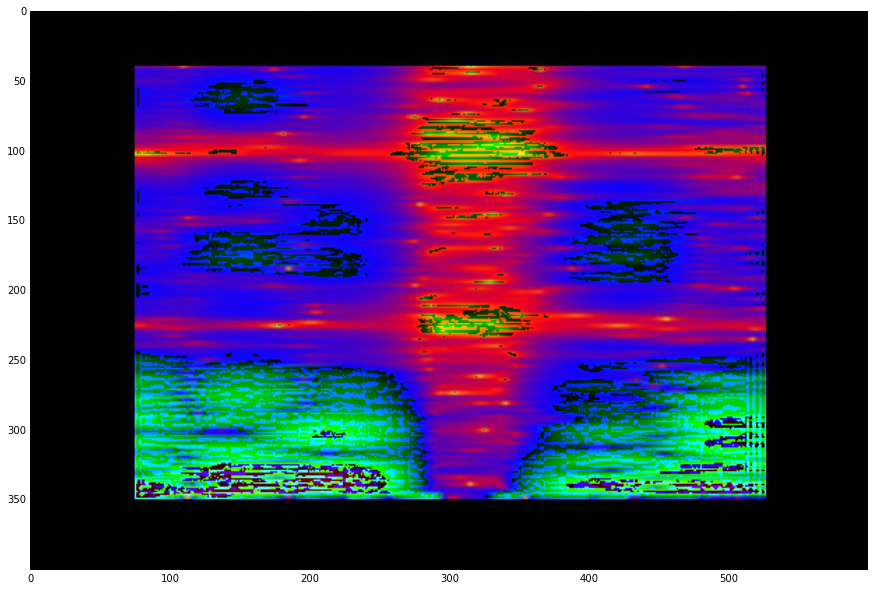

0
drawing is detected as patient


In [6]:
cnn_file='C:/Users/elmon/Desktop/work/Gait Analysis/GaitCNN/retrained_graph.pb'
real_labels='C:/Users/elmon/Desktop/work/Gait Analysis/GaitCNN/inception/laball.txt'
image_file='PDMMHCJ001_2x10_LeftFoot_accZ_frame_3.jpg'
prediction=predict_on_image(image_file, real_labels, cnn_file)


image = (ndimage.imread(image_file).astype(float) - PIXEL_DEPTH / 2) / PIXEL_DEPTH
plt.figure(figsize=(15,15))
plt.imshow(image)
plt.show()


y_pred=np.argmax(prediction)
print(y_pred)
if y_pred==0:
    print('gait is detected as patient')
else:
    print('gait is detected as healthy')
   
    
    
image_file='PDMM001_2x10_LeftFoot_accZ_frame_4.jpg'
prediction=predict_on_image(image_file, real_labels, cnn_file)
y_pred=np.argmax(prediction)

image = (ndimage.imread(image_file).astype(float))
plt.figure(figsize=(15,15))
plt.imshow(image)
plt.show()

print(y_pred)
if y_pred==0:
    print('gait is detected as patient')
else:
    print('gait is detected as healthy')